In [2]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

init_notebook()
figsize = (7,1.65)
fontsize = 11
Fig.config(fontsize, figsize)

from colors import *

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../../data/kyoto.csv', header=None, index_col=0)

In [6]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1.00,2.865,2.842,2.765,2.808,2.812,2.798,2.542,2.508,2.544,2.504,2.536,2.510
0.50,2.522,2.526,2.556,2.606,2.551,2.616,1.857,1.836,1.853,1.856,1.862,1.849
0.25,3.611,3.671,3.677,3.608,3.608,3.607,1.374,1.356,1.375,1.358,1.374,1.369
0.12,5.320,5.388,5.413,5.115,5.361,5.239,1.030,1.012,1.007,1.028,1.025,1.026
0.06,5.551,5.625,5.539,5.588,5.448,5.539,0.783,0.797,0.800,0.796,0.794,0.788
0.03,5.200,5.107,5.169,5.005,5.031,5.112,0.656,0.654,0.655,0.678,0.650,0.652
0.01,4.488,4.389,4.267,4.390,4.364,4.333,0.566,0.575,0.556,0.569,0.567,0.558
0.00,3.671,3.710,3.742,3.658,3.639,3.787,0.492,0.497,0.490,0.498,0.487,0.491


In [7]:
mmap = [1,2,3,4,5, 6]
snapshot = [7, 8, 9, 10, 11, 12]

df_mean = pd.DataFrame()
df_mean['msync'] = df[mmap].mean(axis=1)
df_mean['Snapshot'] = df[snapshot].mean(axis=1)
df_mean_orig = df_mean.copy(deep=True)
df_mean.index = ["%.0f" % val for val in 1/df_mean.index]

In [8]:
df_mean_orig

,msync,Snapshot
0,,
1.00,2.815000,2.524000
0.50,2.562833,1.852167
0.25,3.630333,1.367667
0.12,5.306000,1.021333
0.06,5.548333,0.793000
0.03,5.104000,0.657500
0.01,4.371833,0.565167
0.00,3.701167,0.492500


In [9]:
df_e_max = pd.DataFrame()
df_e_max['msync'] = df[mmap].max(axis=1)
df_e_max['Snapshot'] = df[snapshot].max(axis=1)
df_e_max = df_e_max.T - df_mean_orig.T

df_e_max

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
msync,0.05,0.053167,0.046667,0.107000,0.076667,0.0960,0.116167,0.085833
Snapshot,0.02,0.009833,0.007333,0.008667,0.007000,0.0205,0.009833,0.005500


In [10]:
df_e_min = pd.DataFrame()
df_e_min['msync'] = df[mmap].min(axis=1)
df_e_min['Snapshot'] = df[snapshot].min(axis=1)
df_e_min = df_e_min.T - df_mean_orig.T
df_e_min

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
msync,-0.05,-0.040833,-0.023333,-0.191000,-0.100333,-0.0990,-0.104833,-0.062167
Snapshot,-0.02,-0.016167,-0.011667,-0.014333,-0.010000,-0.0075,-0.009167,-0.005500


In [11]:
yerr_mmap = pd.DataFrame()
yerr_mmap = pd.DataFrame([df_e_min.T['msync'], df_e_max.T['msync']])
yerr_mmap

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
msync,-0.05,-0.040833,-0.023333,-0.191,-0.100333,-0.099,-0.104833,-0.062167
msync,0.05,0.053167,0.046667,0.107,0.076667,0.096,0.116167,0.085833


In [12]:
yerr_snap = pd.DataFrame()
yerr_snap = pd.DataFrame([df_e_min.T['Snapshot'], df_e_max.T['Snapshot']])
yerr_snap

,1.00,0.50,0.25,0.12,0.06,0.03,0.01,0.00
Snapshot,-0.02,-0.016167,-0.011667,-0.014333,-0.010,-0.0075,-0.009167,-0.0055
Snapshot,0.02,0.009833,0.007333,0.008667,0.007,0.0205,0.009833,0.0055


Plot saved as `plots/pathfinding/kyoto-tx.png`

Plot saved as `plots/pathfinding/kyoto-tx.png`

Using pdfcrop on `plots/pathfinding/kyoto-tx.png` with command `pdfcrop plots/pathfinding/kyoto-tx.pdf plots/pathfinding/kyoto-tx.pdf`

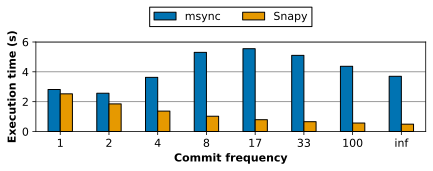

In [13]:
df_mean = rename_cols(df_mean, {'msync': 'msync', 'Snapshot': 'Snapy'})
ax = df_mean.plot.bar(**Fig.get_kwargs())
f = Fig(ax)
ax.grid(axis='y', zorder=0, color='gray')
f.fmt_label("Commit frequency", "Execution time (s)")
f.xrot(rot=0)
f.fmt_legend()
ax.set_yticks(np.arange(0,6.1,2))
save_fig('kyoto-tx')